https://colab.research.google.com/drive/1t8iSZcNn5Th9I7B_FrzrVXh-68jPwsol

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("./titanic.csv")

Data Exploration

In [5]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [6]:
columns_to_drop = ["Name","Fare"]
titanic.drop(columns_to_drop, axis="columns", inplace=True)

In [7]:
titanic.columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [8]:
titanic.shape

(887, 6)

In [9]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [10]:
titanic = pd.get_dummies(titanic, columns=["Sex"],drop_first=True)

In [11]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male       bool
dtype: object

In [12]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [13]:
titanic.rename(columns={"Sex_male": "Sex"}, inplace=True)

In [19]:
titanic = titanic[["Survived","Pclass","Sex","Age","SibSp","Parch"]]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


In [21]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


Training the model

In [24]:
X = titanic.drop(columns=["Survived"])
y = titanic.Survived

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

Evaluating the model

In [29]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

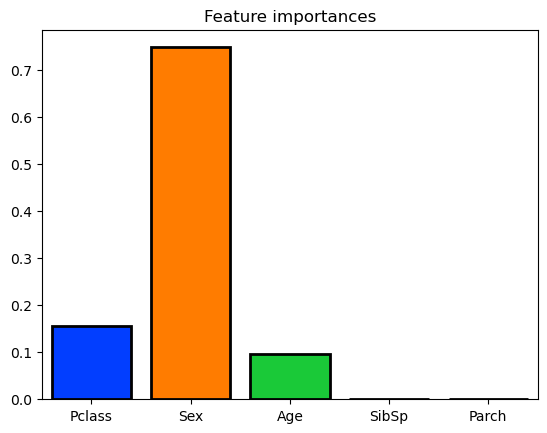

In [34]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette="bright", saturation=2, edgecolor="Black", linewidth=2)
plt.title("Feature importances")
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 